<h1>
    <br style ="font-family:UCL-SoM-Outline;color:#EA7600"> Individual Coursework </br> 
    </p>
</h1>

<img src="figures/som_ft.png" width="70%"  align="right">
<h4>
  <p style="font-size:18pt">MSIN0097 Predictive Analytics</p>
</h4>


# COURSEWORK: WARNER MUSIC



### PREDICTING THE SUCCESS OF ARTISTS ON SPOTIFY

Please complete the sections of this Notebook with supporting code and markup analysis where appropriate. During this coursework you will:

- Understand the specific business forecast task 
- Prepare a dataset, clean and impute where necessary 
- Train an ensemble classifier 
- Evaluate the performance and comment of success and failure modes
- Complete all necessary stages of the data science process 

2000 words plus code, markup text within cells of the Notebook. 

This is approximately 100 words per ACTION cell, but use the wordcount over the duration of the Notebook at your discretion. 


# Assessement 

** Assessment Deadlines **

Please see the Business Analytics tab on the School of Management Student Information Centre for full details of coursework submission deadlines.

- 21/02/2019

**Assessment Type**: 

- 60% Individual Coursework of 2000 words plus code, markup text within cells of the Notebook. Approximately 100 words per ACTION cell. 


## 0. Business Case Understanding

### INTRODUCTION

Over the last few years, the music industry has been dominated by digital streaming services, which produce vast amounts of data on listeners and their preferences. 

This has required major players in the industry to adopt a data driven approach to content delivery in order to stay competitive. 

Warner Music Group is looking to leverage its rich database to better understand the factors that have the most significant impact on the success of a new artist. This will allow them to optimize the allocation of resources when signing and promoting new artists.

Warner’s (large) database contains several sources of data, including the streaming platforms Spotify, Amazon Live and Apple Music. 

For this case study, we will be looking using the Spotify dataset to predict the success of artists. In particular, we want to understand the role of Spotify playlists on the performance of artist.

### Streaming Music

When artists release music digitally, details of how their music is streamed can be closely monitored. 

Some of these details include:

- How listeners found their music (a recommendation, a playlist)
- Where and when (a routine visit to the gym, a party, while working). 
- On what device (mobile / PC)
- And so on…

Spotify alone *process nearly 1 billion streams every day* (Dredge, 2015) and this streaming data is documented in detail every time a user accesses the platform. 

Analyzing this data potentially enables us to gain a much deeper insight into customers’ listening behavior and individual tastes. 

Spotify uses it to drive their recommender systems – these tailor and individualize content as well as helping the artists reach wider and more relevant audiences. 

Warner Music would like to use it to better understand the factors that influence the *future success of its artists*, *identify potentially successful acts* early on in their careers and use this analysis to make resource decisions about how they market and support their artists.

### What are Spotify Playlists and why are relevant today?

A playlist is a group of tracks that you can save under a name, listen to, and update at your leisure. 


<img src = 'figures/spotify_playlist_image.png' width="50%"  align="left">

**Figure 1. Screen shot of Spotify product show artists and playlists.**

Spotify currently has more than two billion publicly available playlists, many of which are curated by Spotify’s in-house team of editors. 

The editors scour the web on a daily basis to remain up-to-date with the newest releases, and to create playlists geared towards different desires and needs. 

Additionally, there are playlists such as [Discover Weekly](https://www.spotify.com/uk/discoverweekly/) and [Release Radar](https://support.spotify.com/uk/using_spotify/playlists/release-radar/) that use self-learning algorithms to study a user’s listening behavior over time and recommend songs tailored to his/her tastes.
	
The figure below illustrates the progression of artists on Spotify Playlists:

<img src = 'figures/playlist_heirarchy.png' width="80%"  align="left">

**Figure 2. Figure to illustarte selecting artists and building audience profiles over progressively larger audiences of different playlists. **

The artist pool starts off very dense at the bottom, as new artists are picked up on the smaller playlists, and thins on the way to the top, as only the most promising of them make it through to more selective playlists. The playlists on the very top contain the most successful, chart-topping artists.

An important discovery that has been made is that certain playlists have more of an influence on the popularity, stream count and future success of an artist than others. 

<img src = 'figures/playlist_lift.png' width="80%"  align="left">

** Figure 3. Figure to illustrate taking song stream data and using it to predict the trajectory, and likely success, of Warner artists. **

Moreover, some playlists have been seen to be pivotal in the careers of successful artists. Artists that do make it onto one of these *key* playlists frequently go on to become highly ranked in the music charts. 

It is the objective of Warner’s [A&R](https://en.wikipedia.org/wiki/Artists_and_repertoire) team to identify and sign artists before they achieve this level of success i.e. before they get selected for these playlists, in order to increase their ROI. 

### BUSINESS PROBLEM → DATA PROBLEM

Now that we have a better understanding of the business problem, we can begin to think about how we could model this problem using data. 

The first thing we can do is defining a criterion for measuring artist success. 

Based on our business problem, one way in which we can do this is to create a binary variable representing the success / failure of an artist and determined by whether a song ends up on a key playlist (1), or not (0). We can then generate features for that artist to determine the impact they have on the success of an artist.

Our problem thus becomes a classification task, which can be modeled as follows:

### *Artist Feature 1 + Artist Feature 2 …. + Artist Feature N = Probability of Success*

where,

**Success (1) = Artist Features on Key Playlist**

The key playlists we will use for this case study are the 4 listed below, as recommended by Warner Analysts:

1.	Hot Hits UK
2.	Massive Dance Hits
3.	The Indie List
4.	New Music Friday


The coursework task is to take a look at the Spotify dataset to see how we might be able to set up this classification model.

Complete the code sections below to work through the project from start to finish. 
<br>

In [ ]:
# Python Project Template

# 1. Prepare Problem
# a) Load libraries
# b) Load dataset

# 2. Summarize Data
# a) Descriptive statistics
# b) Data visualizations

# 3. Prepare Data
# a) Data Cleaning
# b) Feature Selection
# c) Data Transforms

# 4. Evaluate Algorithms
# a) Split-out validation dataset
# b) Test options and evaluation metric
# c) Spot Check Algorithms
# d) Compare Algorithms

# 5. Improve Accuracy
# a) Algorithm Tuning
# b) Ensembles

# 6. Finalize Model
# a) Predictions on validation dataset
# b) Create standalone model on entire training dataset
# c) Save model for later use

Review "R6 - Predictive Modeling template" Notebook from week 6 on Moodle for further details of what each stage of the project should look like. 

<div class="alert alert-warning">
<b>ACTION: Guidance </b> 

<p>If you need to do something, instructions will appear in a box like this</p> 

</div>

## 1. Prepare the problem 

Run your code on Sherlock. We have prepared some of the data for you already. 

In addition, we have imported a custom module (spotfunc.py) containing useful functions written for this dataset.

In [2]:
# Preamble 

import sherlockml.filesystem as sfs
import pandas as pd
import random

sfs.get('/input/spotfunc.py', 'spotfunc.py')
sfs.get('/input/playlists_ids_and_titles.csv', 'playlists_ids_and_titles.csv')
sfs.get('/input/newartists2015onwards.csv', 'newartists2015onwards.csv')

# Add more stuff here as necessary 

# Import all required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings 
warnings.simplefilter('ignore')
from functools import reduce

import seaborn as sns

from patsy import dmatrices
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Import custom functions from library, named 'spotfunc'
#import spotfunc as spotfunc_v2


/opt/anaconda/envs/Python3/lib/python3.6/site-packages/sherlockml/filesystem.py:21: UserWarning: sherlockml.filesystem has been renamed sherlockml.datasets - please update your code to use the new import location
  warnings.warn(_WARNING_MESSAGE)




# 2. Data Understanding

<br>
A year’s worth of Spotify streaming data in the WMG database amounts to approximately 50 billion rows of data i.e. 50 billion streams (1.5 to 2 terabytes worth), with a total of seven years of data stored altogether (2010 till today).

For the purposes of this case study, we will be using a sample of this data. The dataset uploaded on the Sherlock server is about 16GB, containing data from 2015 - 2017. Given the limits on RAM and cores, we will be taking a further sample of this data for purposes of this case study: a 10% random sample of the total dataset, saved as 'cleaned_data.csv'. 

*Note: The code for this sampling in included below, but commented out.*

We can begin with reading in the datasets we will need. We will be using 2 files: 
1. Primary Spotify dataset
2. Playlist Name Mapper (only playlist IDs provided in primary dataset)



In [129]:
# %%time
# Sampling data to read in 10% 
# sfs.get('/input/all_artists_with_date_time_detail.csv', 'client-data.csv')
# # Read in data
# # The data to load
# f = 'client-data.csv'
# # Count the lines
# num_lines = sum(1 for l in open(f))
# n = 10
# # Count the lines or use an upper bound
# num_lines = sum(1 for l in open(f))
# # The row indices to skip - make sure 0 is not included to keep the header!
# skip_idx = [x for x in range(1, num_lines) if x % n != 0]
# # Read the data
# data = pd.read_csv(f, skiprows=skip_idx )


Read in the data

In [1]:
%%time
# Read in sampled data
data = pd.read_csv('cleaned_data.csv')
print('rows:',len(data))

# Keep a copy of original data in case of changes made to dataframe
all_artists = data.copy()

# Load playlist data
playlist_ids_and_titles = pd.read_csv('playlists_ids_and_titles.csv',encoding = 'latin-1',error_bad_lines=False,warn_bad_lines=False)

# Keep only those with 22 characters (data cleaning)
playlist_mapper = playlist_ids_and_titles[playlist_ids_and_titles.id.str.len()==22].drop_duplicates(['id'])


NameError: name 'pd' is not defined

## 2.1 Data Inspection

<div class="alert alert-warning">
<b>ACTION: Inspect the data </b> 

<p>Make sure you understand the data. Use methods like **`data.head()`** and **`data.info()`**</p> 

</div>

There are two main dataframes used in this project. One is the main dataframe where each row represents a stream and the relevant information about the artist, timestamp, playlist and etc. This dataframe contains more than three million rows. Whereas the other one is playlist id and playlist name mapper.

In [4]:
data.head()

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,day,log_time,mobile,track_id,isrc,upc,artist_name,...,hour,minute,week,month,year,date,weekday,weekday_name,playlist_id,playlist_name
0,0,9,"('small_artists_2016.csv', 9)",10,20160510T12:15:00,True,8f1924eab3804f308427c31d925c1b3f,USAT21600547,7.567991e+10,Sturgill Simpson,...,12,15,19,5,2016,2016-05-10,1,Tuesday,NaN,NaN
1,1,19,"('small_artists_2016.csv', 19)",10,20160510T12:15:00,True,8f1924eab3804f308427c31d925c1b3f,USAT21600547,7.567991e+10,Sturgill Simpson,...,12,15,19,5,2016,2016-05-10,1,Tuesday,NaN,NaN
2,2,29,"('small_artists_2016.csv', 29)",10,20160510T14:00:00,True,8f1924eab3804f308427c31d925c1b3f,USAT21600547,7.567991e+10,Sturgill Simpson,...,14,0,19,5,2016,2016-05-10,1,Tuesday,NaN,NaN
3,3,39,"('small_artists_2016.csv', 39)",10,20160510T10:45:00,True,8f1924eab3804f308427c31d925c1b3f,USAT21600547,7.567991e+10,Sturgill Simpson,...,10,45,19,5,2016,2016-05-10,1,Tuesday,NaN,NaN
4,4,49,"('small_artists_2016.csv', 49)",10,20160510T10:15:00,True,8f1924eab3804f308427c31d925c1b3f,USAT21600547,7.567991e+10,Sturgill Simpson,...,10,15,19,5,2016,2016-05-10,1,Tuesday,NaN,NaN


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3805499 entries, 0 to 3805498
Data columns (total 45 columns):
Unnamed: 0           int64
Unnamed: 0.1         int64
Unnamed: 0.1.1       object
day                  int64
log_time             object
mobile               bool
track_id             object
isrc                 object
upc                  float64
artist_name          object
track_name           object
album_name           object
customer_id          object
postal_code          object
access               object
country_code         object
gender               object
birth_year           float64
filename             object
region_code          object
referral_code        float64
partner_name         object
financial_product    object
user_product_type    object
offline_timestamp    float64
stream_length        float64
stream_cached        float64
stream_source        object
stream_source_uri    object
stream_device        object
stream_os            object
track_uri         

In [6]:
playlist_mapper.head()

,id,name
0,607qZnoGjqhpWjOaJWakmx,80er jaren
1,4xP3wJiHkHfyPcGBjsZcpf,Glee
2,1iHOfbhKGHImcrEJXhrUdg,Best of 1980s
3,08AR0IWSEfi0GCnB7b6AAW,Kesähitit/yhden hitin ihmeet/sekalaista
4,3DeVsW7nzA3qezOMowGkeu,Músicas para Transar


The columns you should *focus* on for this case study are:

* Log Time – timestamp of each stream
* Artist Name(s) – some songs feature more than one artist
* Track Name
* ISRC - (Unique code identifier for that version of the song, i.e. radio edit, album version, remix etc.)
* Customer ID
* Birth Year
* Location of Customer
* Gender of Customer
* Stream Source URI – where on Spotify was the song played – unique playlist ID, an artist’s page, an album etc.


## 2.2 Select the relevant columns

The type of the log time is actually a string and it is noticed that the date and the time in the log_time column is separated by a character 'T'. In fact, in the orginal dataset, the date, month, year, hour, minute etc. have been extracted for us, so we can simply extract those columns rather than the log_time column. 

In [7]:
type(data['log_time'][0])

str

In [8]:
# relevant columns are selected from the original dataframe
data_cleaned = data[['year','month','week','weekday','weekday_name','date','hour','minute',
                     'artist_name','track_name','isrc','customer_id',
                     'birth_year','region_code','postal_code','gender','stream_source_uri']]

In [9]:
data_cleaned.head()

,year,month,week,weekday,weekday_name,date,hour,minute,artist_name,track_name,isrc,customer_id,birth_year,region_code,postal_code,gender,stream_source_uri
0,2016,5,19,1,Tuesday,2016-05-10,12,15,Sturgill Simpson,Call To Arms,USAT21600547,6c022a8376c10aae37abb839eb7625fe,1968.0,GB-DUR,NE,male,NaN
1,2016,5,19,1,Tuesday,2016-05-10,12,15,Sturgill Simpson,Call To Arms,USAT21600547,6c022a8376c10aae37abb839eb7625fe,1968.0,GB-DUR,NE,male,NaN
2,2016,5,19,1,Tuesday,2016-05-10,14,0,Sturgill Simpson,Call To Arms,USAT21600547,352292382ff3ee0cfd3b73b94ea0ff8f,1995.0,GB-ESS,1,male,NaN
3,2016,5,19,1,Tuesday,2016-05-10,10,45,Sturgill Simpson,Call To Arms,USAT21600547,c3f2b54e76696ed491d9d8f964c97774,1992.0,GB-HRT,MK,male,NaN
4,2016,5,19,1,Tuesday,2016-05-10,10,15,Sturgill Simpson,Call To Arms,USAT21600547,6a06a9bbe042c73e8f1a3596ec321636,1979.0,GB-LND,KT,male,NaN


It is found out that weekday is represented by a number, the below table shows the match between the weekday number and the weekday name. 

In [10]:
data_cleaned[['weekday','weekday_name']].drop_duplicates().sort_values(by='weekday')

,weekday,weekday_name
150,0,Monday
0,1,Tuesday
38,2,Wednesday
39,3,Thursday
22,4,Friday
104,5,Saturday
37,6,Sunday


## 2.3 Merge with the playlist mapper table

In [11]:
#split the stream_source_uri column and extract the playlist id
def extract_playlistid(uri):
    if type(uri) == str:
        playlistid = uri.split(':')[-1]
        return playlistid

data_cleaned.loc[:,'playlistid'] = data_cleaned.loc[:,'stream_source_uri'].apply(extract_playlistid)

Left join rather than inner join has been used here so that those rows that are not matched with a playlist name are still kept

In [12]:
# left join the data_cleaned table with the playlist_mapper table
data_cleaned = pd.merge(data_cleaned,playlist_mapper,left_on='playlistid',right_on='id',how='left')

In [13]:
#change the name of the playlist name column
data_cleaned.rename(columns={'name':'playlist_name'},inplace=True)

## 2.4 Exploratory Data Analysis


<div class="alert alert-warning">
<b>ACTION: Exploratory analysis </b> 

<p>As demonstrated in class, explore various distribution of the data. Comment on any patterns you can see.</p>

<p>- Highlight on any potential uncertainties or peculiarities that you observe. </p> 

<p>- Variables you might explore, include, but are not limited to: Age, Gender, Stream counts and playlists.</p>

<p> - Use figures, plots and visualization as necessary.</p>

</div>

### 2.4.1 Explore the year column

In [14]:
data_cleaned['year'].value_counts()

2017    1871744
2016    1727360
2015     205293
2014       1102
Name: year, dtype: int64

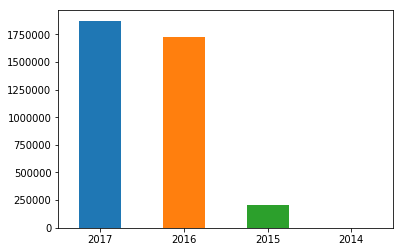

In [15]:
data_cleaned['year'].value_counts().plot.bar(rot=0)
plt.show()

It is noticed that most of the data are in the year 2017 and 2016.

### 2.4.2 Explore the month column

In [16]:
data_cleaned['month'].value_counts().sort_index()

1     216827
2     330117
3     367099
4     368955
5     502617
6     508746
7     467486
8     198614
9     220286
10    210835
11    218602
12    195315
Name: month, dtype: int64

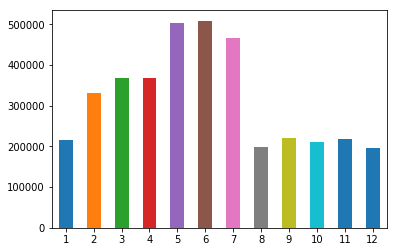

In [17]:
data_cleaned['month'].value_counts().sort_index().plot.bar(rot=0)
plt.show()

Most of the data are concentrated between May and July and the second half of the year have less stream than the first half of the year.

### 2.4.3 Explore the weekday column

In [18]:
data_cleaned['weekday'].value_counts().sort_index()

0    763953
1    356765
2    646564
3    354268
4    659597
5    697951
6    326401
Name: weekday, dtype: int64

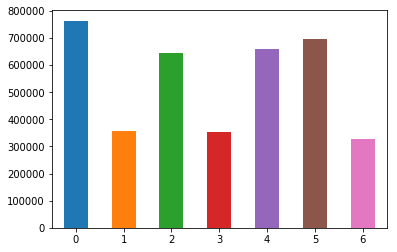

In [19]:
data_cleaned['weekday'].value_counts().sort_index().plot.bar(rot=0)
plt.show()

Noted that 0 refers to Monday and 6 refers to Sunday. No particular trend has been shown among weekdays. Monday, Wednesday, Friday and Saturday have relatively more streams than other weekdays.

### 2.4.4 Explore the hour and minute column

In [20]:
data_cleaned['hour'].value_counts().sort_index()

0      64334
1      47165
2      37153
3      31943
4      30146
5      42608
6      95303
7     155764
8     170851
9     181998
10    209981
11    218253
12    214627
13    215455
14    231447
15    256739
16    275134
17    272160
18    250817
19    225437
20    194429
21    162682
22    127893
23     93180
Name: hour, dtype: int64

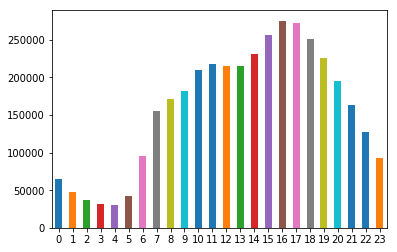

In [21]:
data_cleaned['hour'].value_counts().sort_index().plot.bar(rot=0)
plt.show()

The above chart shows an interesting trend where most streams happen in the afternoon rush hours (peaked at 4pm). However, there is no obvious increase during the morning rush hours. 

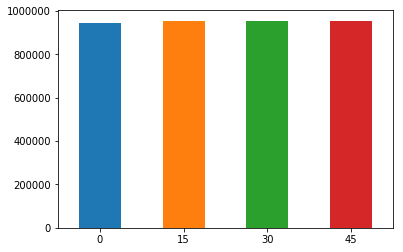

In [22]:
data_cleaned['minute'].value_counts().sort_index().plot.bar(rot=0)
plt.show()

At the minute level, no significant difference between different time in a hour. 

### 2.4.5 Explore the artist_name and track_name column

In [23]:
len(data_cleaned['artist_name'].value_counts())

661

In [24]:
#The percentage of streams for the top 10 artists
(data_cleaned['artist_name'].value_counts()/data_cleaned['artist_name'].value_counts().sum()*100)[:10]

Charlie Puth    11.769100
Dua Lipa         8.294917
Lukas Graham     8.179505
Cheat Codes      6.722377
Anne-Marie       6.515151
Matoma           5.576404
gnash            4.353779
WSTRN            4.332809
Lil Uzi Vert     3.854738
The Hunna        3.476206
Name: artist_name, dtype: float64

It is found out that there are in total 661 artists in this dataset, however, the top 10 most streamed artists account for more than 60% of the total amount of streams with Charlie Puth as the most streamed artist, which implies it is a very long-tailed distribution.

In [25]:
len(data_cleaned['track_name'].value_counts())

3848

In [26]:
(data_cleaned['track_name'].value_counts()/data_cleaned['track_name'].value_counts().sum()*100)[:10]

7 Years                                       6.093682
i hate u, i love u (feat. olivia o'brien)     3.888610
iSpy (feat. Lil Yachty)                       3.125083
Sex                                           3.077862
We Don't Talk Anymore (feat. Selena Gomez)    3.048483
Alarm                                         2.967994
Marvin Gaye (feat. Meghan Trainor)            2.937381
In2                                           2.857181
Ciao Adios                                    2.470714
Be The One                                    2.406833
Name: track_name, dtype: float64

The similar trend has been found for the tracks, but the distribution is less concentrated on the first few tracks compared to the artist_name column.

### 2.4.6 Explore the age and gender of customers

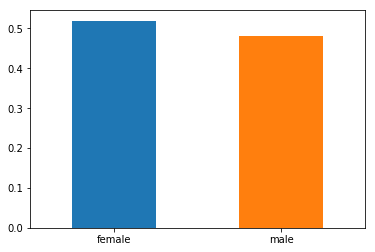

female    0.519437
male      0.480563
Name: gender, dtype: float64

In [27]:
# the percentage of streams from female / male
stream_gender = data_cleaned['gender'].value_counts()/data_cleaned['gender'].value_counts().sum()
stream_gender.plot.bar(rot=0)
plt.show()

stream_gender

It is shown that female has slightly more streams than male

In [28]:
# generate a unique match for each customer_id and its gender and birth_year
unique_gender_age = data_cleaned[['customer_id','gender','birth_year']].drop_duplicates()

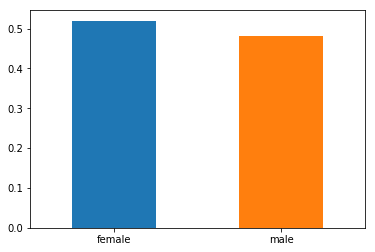

female    0.519709
male      0.480291
Name: gender, dtype: float64

In [29]:
# the percentage of female and male customers
uni_gender = unique_gender_age['gender'].value_counts()/unique_gender_age['gender'].value_counts().sum()
uni_gender.plot.bar(rot=0)
plt.show()

uni_gender

In fact, very similar to the percentage of streams from female and male, the percentage of female customers is slightly more than male. This suggests that the number of streams per customers is similar between female and male.

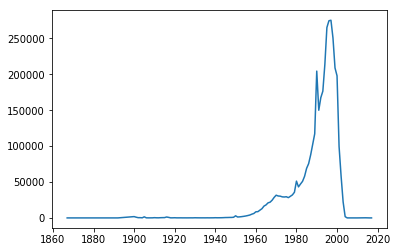

In [30]:
# the age distribution of customers
data_cleaned['birth_year'].value_counts().sort_index().plot()
plt.show()

As shown above, the main group of customers are born in 1980s and 1990s. And there are obviously some outliers (e.g. born before 1920), which might be wrong data.

Let's zoom in and see more details of the age distribution. The below graph shows that the majority customers are born between 1990 and 2000. However, there is a sudden increase in 1990, which is not consistent with the general trend, which might be caused by <b>customers inputting wrong data</b>. 

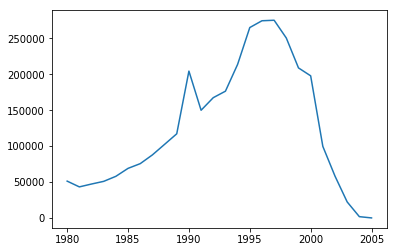

In [31]:
data_cleaned['birth_year'].value_counts().sort_index().loc[1980:2005].plot()
plt.show()

In order to make use of the birth year variable in further analysis, we need to convert the birth_year variable into a couple of age bins. Suggested by the birth years distribution as shown above, we can bin those born before 1960 into one group because they only represent a small amount of users and then every 10 years are in one bin.

In [32]:
#binning the birth_year variable
def age_bin(year):
    if year < 1960:
        return 'before_1960'
    elif year < 1970:
        return '1960s'
    elif year < 1980:
        return '1970s'
    elif year < 1990:
        return '1980s'
    elif year < 2000:
        return '1990s'
    else:
        return '2000s'

unique_gender_age.loc[:,'age_bin'] = unique_gender_age.loc[:,'birth_year'].apply(age_bin)
data_cleaned.loc[:,'age_bin'] = data_cleaned.loc[:,'birth_year'].apply(age_bin)

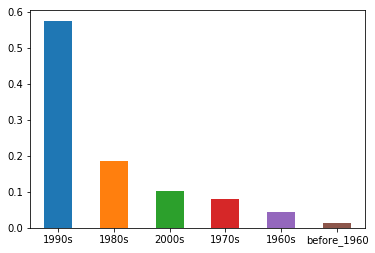

1990s          0.574673
1980s          0.184632
2000s          0.102505
1970s          0.080565
1960s          0.045085
before_1960    0.012541
Name: age_bin, dtype: float64

In [33]:
#the percentage of strems from each age group
stream_age = data_cleaned['age_bin'].value_counts()/data_cleaned['age_bin'].value_counts().sum()
stream_age.plot.bar(rot=0)
plt.show()

stream_age

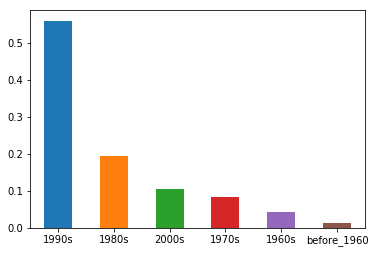

1990s          0.560071
1980s          0.194725
2000s          0.104121
1970s          0.083972
1960s          0.043832
before_1960    0.013279
Name: age_bin, dtype: float64

In [34]:
#the percentage of customers from each age group
uni_age = unique_gender_age['age_bin'].value_counts()/unique_gender_age['age_bin'].value_counts().sum()
uni_age.plot.bar(rot=0)
plt.show()

uni_age

As we can see from the above charts, the 1990s are the main users in the platform and followed by 1980s and 2000s. Also, comparing the streams for each age group and the number of users in each age group, it suggests that the number stream per user is similar across age groups. 

### 2.4.7 Explore the playlist

In [35]:
(data_cleaned['playlist_name'].value_counts()/data_cleaned['playlist_name'].value_counts().sum()).iloc[:10]

Hot Hits UK                         0.197786
Today's Top Hits                    0.107631
Topsify UK Top 40                   0.056155
Freshness: Hot House Music          0.033664
The Pop List                        0.029241
New Music Monday UK                 0.028386
Happy Hits!                         0.019167
Summer Hits                         0.017181
Top Tracks in The United Kingdom    0.015855
You've Got Male - R&B: The Men      0.015092
Name: playlist_name, dtype: float64

The above shows the top 10 streamed playlist in the dataset, and 'Hot Hits UK' is the most streamed and it is also one of the target playlist in this case. 

### 2.4.8 Export the cleaned dataset for further steps

Exported the cleaned dataset to save the memory.

In [36]:
data_cleaned.to_csv('data_after_cleaned.csv')

-- --

# 3.	Data Preperation and Feature Engineering
<br>
From our business understanding, we know that our criteria for success is whether or not an artist has been on one of 4 key playlists.  The column ‘stream_source_uri’, contains data about the source of the stream – whether it was from an artist’s page, an album, a playlist etc. 

For streams coming from different playlists, only the Spotify URI code is provided. To make sense of this column and identify our key playlists, we can use the additional table provided that we cleaned above and named 'playlist_mapper'.

We can being by out data preperation by subsetting the 4 key playlists we are interested in and creating our dependent variable:

## 3.1 Building dependent variable

<div class="alert alert-warning">
<b>ACTION: Dependant variable </b> 

<p> Set up the problem as one of classification, selecting the relevant playlists as the variable we are trying to model.</p>

<p> Write useful helper functions to support creating of the feature vector and target vector </p>


</div>

In [257]:
# read in the cleaned dataframe
#%%time
data_cleaned = pd.read_csv('data_after_cleaned.csv')

The first step is to check if the playlist (if exists) of each stream is in one of the four key playlists 

In [258]:
# 4 key Playlists
key_playlist = ['Hot Hits UK','Massive Dance Hits','The Indie List','New Music Friday']

# select relevant playlists 
def set_dep(playlist_name):
    if playlist_name in key_playlist:
        return 1
    else:
        return 0

data_cleaned['target'] = data_cleaned['playlist_name'].apply(set_dep)

In [259]:
data_cleaned[data_cleaned['target']==1].shape

(202779, 23)

Around 200,000 streams are from one of the key playlists

However, we cannot simply use all the data to construct the dependent and independent variables. There are mainly two reasons behind this. Firstly, since the definition of successful artist is the four key playlists, if we are using streaming features to build both independent and dependent variable then there is no need to predict anymore because if you know the streaming data of an artist then you will also know if he is in the key playlists as well. Secondly, if all data are used, we could be end up with using the data after one artist succeed to predict if this artist will succeed. 

Therefore, for those artists that have ever enter the key playlists in the dataset, I am only the data before they enter key playlists for the first time to build independent variables. While for those unsuccessful artists, I am using all of their data to build the independent variables.

In [260]:
# convert date to datetime format
from datetime import datetime

def convert_date(data):
    datetime_object = datetime.strptime(data, '%Y-%m-%d')
    return datetime_object

data_cleaned['datetime'] = data_cleaned['date'].apply(convert_date)

In [261]:
# checking how many times an artist succeed 
target_sum = data_cleaned.groupby('artist_name').agg({'target':sum})

In [262]:
# getting those artists that haven't been successful at all
unsuccess = target_sum[target_sum['target'] == 0].reset_index()
unsuccess_data = pd.merge(data_cleaned,unsuccess,on='artist_name',how='inner',suffixes=('','1'))
unsuccess_data.drop(columns=['target1'],inplace=True)

In [263]:
# getting those artists that have ever been successful
success = data_cleaned[data_cleaned['target'] == 1]

In [264]:
# getting the first time when these artists enter the key playlist
first_success = pd.DataFrame(success.groupby('artist_name')['datetime'].nsmallest(1)).reset_index()

In [265]:
# merged with the original dataset to get all data for these successful artists
success_mg = pd.merge(data_cleaned,first_success,on='artist_name',how='inner')
success_mg.rename(columns={'datetime_x':'datetime','datetime_y':'first_suc_date'},inplace = True)
success_mg.drop(columns=['level_1'],inplace=True)

In [266]:
# get only the data before they first succeed
success_data = success_mg[success_mg['datetime'] < success_mg['first_suc_date']]
success_data.drop(columns=['first_suc_date'],inplace=True)

In [267]:
# setting the dependent variable for those successful artists to be 1
success_data['target'] = 1

In [268]:
# concat success and unsuccess artist data
data_cleaned = pd.concat([success_data,unsuccess_data],axis=0)

## 3.2 FEATURE ENGINEERING

1.	Artist Features
2.	Playlist Features
3.	User-base features


### 3.2.1 Artist features

*	Stream count
*	Total Number of users
*	Passion Score 

<div class="alert alert-warning">
<b>ACTION: Artist features </b> 

<p> Write useful functions to create these new features. </p>


</div>

We can use artist passion score to represents an artist's popularity since artist passion score equals stream count per artist divided by total number of unique users of each artist. The higher the passion score, the more popular the artist. 

#### 3.2.1.1 Stream count per artist

In [269]:
# Stream count per artist
stream_count_artist = data_cleaned['artist_name'].value_counts()

In [270]:
stream_count_artist[:11]

The Hunna        40705
Coasts           33622
A R I Z O N A    19475
Matoma           17874
Terror Jr        16830
RAT BOY          16077
VANT             15789
Foy Vance        15760
dvsn             15497
Gallant          14768
Rationale        12821
Name: artist_name, dtype: int64

#### 3.2.1.2 Number of users per artist

In [271]:
# Number of unique users per artist
users_per_artist = data_cleaned[['customer_id','artist_name']].drop_duplicates()['artist_name'].value_counts()

In [272]:
users_per_artist[:11]

Coasts           24872
The Hunna        20871
A R I Z O N A    17869
Matoma           16641
Terror Jr        13656
RAT BOY          12850
Foy Vance        12122
VANT             12067
Gallant          11870
dvsn             11540
Icarus           11235
Name: artist_name, dtype: int64

#### 3.2.1.3 Artist Passion Score

In [273]:
# Passion Score
artist_passion_score = pd.merge(stream_count_artist.reset_index(),users_per_artist.reset_index(),on='index',how='inner')
artist_passion_score.rename(columns={'index':'artist_name',
                                     'artist_name_x':'stream_count_artist',
                                     'artist_name_y':'users_per_artist'},inplace=True)

In [274]:
artist_passion_score['passion_score'] = artist_passion_score['stream_count_artist']/artist_passion_score['users_per_artist']

In [275]:
artist_passion_score.head()

,artist_name,stream_count_artist,users_per_artist,passion_score
0,The Hunna,40705,20871,1.950314
1,Coasts,33622,24872,1.351801
2,A R I Z O N A,19475,17869,1.089876
3,Matoma,17874,16641,1.074094
4,Terror Jr,16830,13656,1.232425


#### 3.2.1.4 The number of playlists each artist featured in

Apart from the artist passion score, we can also use the number of playlists that each artist has featured in as one of the features to represent the popularity of an artist. 

In [276]:
ap_unique = data_cleaned[['artist_name','playlist_name']].drop_duplicates()

In [277]:
num_playlist = pd.DataFrame(ap_unique.groupby('artist_name').size(),columns=['num_playlist']).reset_index()

### 3.2.2 Playlist Features


* Prior Playlist Stream Counts
* Prior Playlist Unique Users (Reach)
* Prior Playlist Passion Score


<div class="alert alert-warning">
<b>ACTION: Playlist features </b> 

<p> Write useful functions to create new playlist features, like those listed in the cell above. </p>

<p> Are there other sensible ones you could suggest, work in your group to think about what other features might be useful and whether you can calculate them with the data you have </p>

</div>

Similar to the idea of artist passion score, we can also use playlist passion score to represent the popularity of playlists. And the playlist passion scores equals to the stream count of each playlist divided by the number of unique users of each playlist. 

#### 3.2.2.1 Stream count per playlist

In [278]:
stream_count_playlist = data_cleaned['playlist_name'].value_counts()

In [279]:
stream_count_playlist[:11]

New Music Monday UK              10372
Freshness: Hot House Music        8927
Topsify UK Top 40                 8436
Today's Top Hits                  8226
Rap Caviar                        7388
UK House Music                    4727
Radio 1 Playlist (BBC)            4432
RapCaviar                         3591
The Pop List                      3436
Indie Music To Cheer The Ears     3132
Happy Hits!                       2892
Name: playlist_name, dtype: int64

#### 3.2.2.2 Users per playlist

In [280]:
users_per_playlist = data_cleaned[['customer_id','playlist_name']].drop_duplicates()['playlist_name'].value_counts()

In [281]:
users_per_playlist[:11]

New Music Monday UK              9553
Freshness: Hot House Music       8517
Today's Top Hits                 7877
Topsify UK Top 40                6912
Rap Caviar                       6473
UK House Music                   4418
Radio 1 Playlist (BBC)           3873
The Pop List                     3278
RapCaviar                        3154
Indie Music To Cheer The Ears    2897
Happy Hits!                      2746
Name: playlist_name, dtype: int64

#### 3.2.2.3 Playlist Passion Score

In [282]:
playlist_passion_score = pd.merge(stream_count_playlist.reset_index(),users_per_playlist.reset_index(),
                                  on='index',how='inner')
playlist_passion_score.rename(columns={'index':'playlist_name',
                                       'playlist_name_x':'stream_count_playlist',
                                       'playlist_name_y':'users_per_playlist'},inplace=True)

In [283]:
playlist_passion_score['passion_score'] = playlist_passion_score['stream_count_playlist']/playlist_passion_score['users_per_playlist']

In [284]:
playlist_passion_score.head()

,playlist_name,stream_count_playlist,users_per_playlist,passion_score
0,New Music Monday UK,10372,9553,1.085732
1,Freshness: Hot House Music,8927,8517,1.048139
2,Topsify UK Top 40,8436,6912,1.220486
3,Today's Top Hits,8226,7877,1.044306
4,Rap Caviar,7388,6473,1.141356


#### 3.2.2.4 Weighted average of top 20 playlists' passion scores for each artist

In order to merge the playlist features with each artist, we need to find a way to relate the playlist passion scores with each artist. The way that I propose is that for each artist, find the top 20 streamed playlists for each artist and then calculate the weighted average (weighted according to the number of streams of each top 20 playlist) passion score for each artist. 

In [285]:
# find the top 20 streamed playlists for each artists
artist_playlist_count = data_cleaned.groupby(['artist_name','playlist_name']).size()
artist_playlist_count = artist_playlist_count.groupby(level=0,group_keys=False).nlargest(20)
ap_df = pd.DataFrame(artist_playlist_count).reset_index()
ap_df.rename(columns={0:'stream_count'},inplace=True)

In [286]:
# merge with the relevant playlist passion score
ap_mg = ap_df.merge(playlist_passion_score,on='playlist_name',how='inner')
ap_mg = ap_mg.sort_values(by=['artist_name','stream_count'],ascending=[1,0])
ap_mg.drop(columns=['stream_count_playlist','users_per_playlist'],inplace=True)

In [287]:
# calculate the weighted average passion scores for each artist
artist_20_sum = ap_mg.groupby(['artist_name']).agg({'stream_count':sum})
ap_mg = ap_mg.merge(artist_20_sum,on='artist_name',how='inner',suffixes=('', '_sum'))
ap_mg['wavg_passion'] = ap_mg['stream_count']*ap_mg['passion_score']/ap_mg['stream_count_sum']

In [288]:
artist_wavg = ap_mg.groupby('artist_name').agg({'wavg_passion':sum})

### 3.2.3 User-base features

We can use the age and gender columns to create an audience profile per artist.
*	Gender Percentage Breakdown
*	Age vector quantization 


<div class="alert alert-warning">
<b>ACTION: User features </b> 

<p> Write useful functions to create new user features, like those listed in the cell above. </p>

<p> Are there other sensible ones you could suggest? Work in your group to think about what other features might be useful and whether you can calculate them with the data you have. Justify your reasoning. </p>

</div>

#### 3.2.3.1 Users gender breakdown of artists

We can calculate the proportion of female and male users for each artist and use this as a feature. 

In [289]:
unique_artist_gender = data_cleaned[['customer_id','artist_name','gender']].drop_duplicates()

In [290]:
# Count the number of users for each gender for each artist
artist_gender_count = unique_artist_gender.groupby(['artist_name','gender']).agg(['count'])

In [291]:
# Calculate the proportion of gender for each artist 
artist_gender_prop = artist_gender_count.groupby(level=0).apply(lambda x: x / float(x.sum()))

In [292]:
# fill missing values
artist_gender_prop = artist_gender_prop.reset_index().set_index(['artist_name',
                                                                 'gender']).unstack().fillna(0)

In [293]:
# drop two levels of multi-level index
artist_gender_prop.columns = artist_gender_prop.columns.droplevel().droplevel()

In [294]:
artist_gender_prop.head()

gender,female,male
artist_name,,
#90s Update,0.400000,0.600000
17 Memphis,0.666667,0.333333
2D,0.000000,1.000000
3JS,0.250000,0.750000
99 Percent,0.680307,0.319693


#### 3.2.3.2 Users age breakdown of artists

In [295]:
unique_artist_age = data_cleaned[['customer_id','artist_name','age_bin']].drop_duplicates()

In [296]:
artist_age_count = unique_artist_age.groupby(['artist_name','age_bin']).agg(['count'])

In [297]:
artist_age_prop = artist_age_count.groupby(level=0).apply(lambda x: x / float(x.sum()))

In [298]:
artist_age_prop = artist_age_prop.unstack().fillna(0)

In [299]:
# drop two levels of multi-level index
artist_age_prop.columns = artist_age_prop.columns.droplevel().droplevel()

In [300]:
artist_age_prop.head()

age_bin,1960s,1970s,1980s,1990s,2000s,before_1960
artist_name,,,,,,
#90s Update,0.000000,0.200000,0.333333,0.400000,0.066667,0.000000
17 Memphis,0.083333,0.000000,0.083333,0.666667,0.166667,0.000000
2D,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
3JS,0.000000,0.500000,0.000000,0.500000,0.000000,0.000000
99 Percent,0.043734,0.083263,0.087468,0.526493,0.248949,0.010093


### 3.2.4 Principle Component Analysis

<div class="alert alert-warning">
<b>ACTION: PCA features </b> 

<p> Write useful functions to create new user feature based on regions data. </p>

<p> Are there other sensible features you could suggest? Work in your group to think about what other features might be useful and whether you can calculate them with the data you have. Justify your reasoning. </p>

</div>

As shown below, there are 515 unique region codes in the dataset. Given we only have 309 artists in the dataset, if we have over 500 region code features, the problem becomes unsolvable because there are more unknowns than observations. Therefore, we want to reduce the dimensionality of the dataset using the PCA technique.

#### 3.2.4.1 PCA for region code

In [301]:
len(data_cleaned['region_code'].drop_duplicates())

402

In [302]:
# construct the streams count region code breakdown for artist dataset
artist_region_stream = data_cleaned.groupby(['artist_name','region_code']).agg({'region_code':'count'})

In [303]:
# fill those region zero stream count with 0
artist_region_stream_unstack = artist_region_stream.unstack().fillna(0)

In [304]:
# we need to standarize the data before supplying it to the PCA algorithm
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

artist_region_scaled = scaler.fit_transform(artist_region_stream_unstack)

In [305]:
# Region Code PCA

from sklearn import decomposition

# the number of principle components returns will be 10
pca = decomposition.PCA(n_components = 10)
region_pca = pca.fit_transform(artist_region_scaled)

In [306]:
print(pca.explained_variance_ratio_)
print('Total variance explained: '+ str(np.sum(pca.explained_variance_ratio_)))

[0.44 0.06 0.03 0.03 0.03 0.02 0.02 0.02 0.02 0.02]
Total variance explained: 0.671186259306413


As shown above, the first principle component already accounts for over 44% of variance from the region code features and the total variance explained by the top 10 principle components is about 67%. 

In [307]:
region_pca.shape

(626, 10)

There are only 301 artists have the region code pca features. This is because some of the artists do not have region code information in the original dataset. 

In [308]:
#generate a name list for the pricinple components
pc_name = []
for i in range(1,11):
    pc_name.append('region_pc'+str(i))

In [309]:
#create a DF for the region_pca
region_pcaDF = pd.DataFrame(data = region_pca, columns = pc_name)
artist_pca = pd.Series(artist_region_stream_unstack.index.values,name='artist_name')
region_pcaDF = pd.concat([artist_pca,region_pcaDF],axis=1)

<div class="alert alert-warning">
<b>ACTION: PCA plot </b> 

<p> Use a figure to show which components of PCA explain the majority of variation in the data. Accordingly, use only those components in your further analysis.</p>

</div>

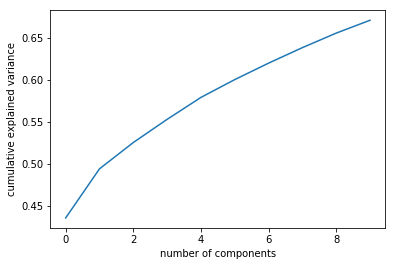

In [310]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

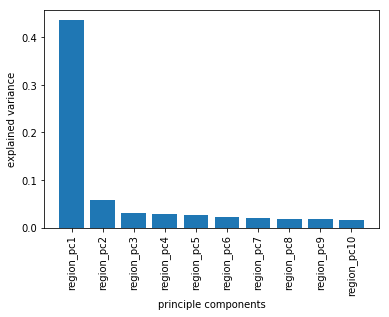

In [311]:
plt.bar(pc_name,pca.explained_variance_ratio_)
plt.xticks(rotation = 90)
plt.xlabel('principle components')
plt.ylabel('explained variance')
plt.show()

We will be using all of the 10 principle components as our independent variables

### 3.2.5 Merging features together

In [312]:
# create a dataframe for unique artists
unique_artist = data_cleaned[['artist_name','target']].drop_duplicates()

In [313]:
# merging all features as well as the dependent variable together 
dfs = [unique_artist,artist_passion_score,artist_age_prop,artist_gender_prop,region_pcaDF,artist_wavg,num_playlist]

df_final = reduce(lambda left,right: pd.merge(left,right,on='artist_name',how='left'), dfs)

In [314]:
df_final.columns

Index(['artist_name', 'target', 'stream_count_artist', 'users_per_artist',
       'passion_score', '1960s', '1970s', '1980s', '1990s', '2000s',
       'before_1960', 'female', 'male', 'region_pc1', 'region_pc2',
       'region_pc3', 'region_pc4', 'region_pc5', 'region_pc6', 'region_pc7',
       'region_pc8', 'region_pc9', 'region_pc10', 'wavg_passion',
       'num_playlist'],
      dtype='object')

In [315]:
df_final = df_final.drop(columns=['stream_count_artist', 'users_per_artist'])
df_final.rename(columns={'passion_score':'artist_passion_score'},inplace=True)

In [316]:
df_final.shape

(643, 23)

In [317]:
df_final = df_final.set_index('artist_name')

## 3.3 Preprocessing

### 3.3.1 Missing values

<div class="alert alert-warning">
<b>ACTION: Missing values </b> 

<p> Use the **`Imputer`** class to alter your final Dataframe that contains your feature vector.</p>

</div>

In [318]:
df_final.isna().any()

target                  False
artist_passion_score    False
1960s                   False
1970s                   False
1980s                   False
1990s                   False
2000s                   False
before_1960             False
female                   True
male                     True
region_pc1               True
region_pc2               True
region_pc3               True
region_pc4               True
region_pc5               True
region_pc6               True
region_pc7               True
region_pc8               True
region_pc9               True
region_pc10              True
wavg_passion             True
num_playlist            False
dtype: bool

As shown above, we only have missing values in the region code PCA and playlist passion score features and gender. And I decide to use the median of each of these features to fill the missing values of these features. 

In [319]:
from sklearn.impute import SimpleImputer

imp = SimpleImputer(strategy='median')

df_final.iloc[:,1:] = imp.fit_transform(df_final.iloc[:,1:])

### 3.3.2 Feature Nomalisation

Since we are more interested in the relative rather than absolute differences between variables. And all independent variables in the data have more relative meaning than absolute meaning, so we will be standardizing all independent variables. After the normalisation, each variable will have a mean of 0 and standard deviation of 1.

<div class="alert alert-warning">
<b>ACTION: Feature transformation </b> 

<p> Comment on whether transforming particular features (influence, gender breakdown, age breakdown) is useful. Calculate the transformation where necessary.</p>

</div>

In [320]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

df_final.iloc[:,1:] = scaler.fit_transform(df_final.iloc[:,1:])

### 3.3.3 Multi-collinearity

<div class="alert alert-warning">
<b>ACTION: Multi-collinearity </b> 

<p> Check and deal with multi-collinearity in your feature set.</p>

</div>

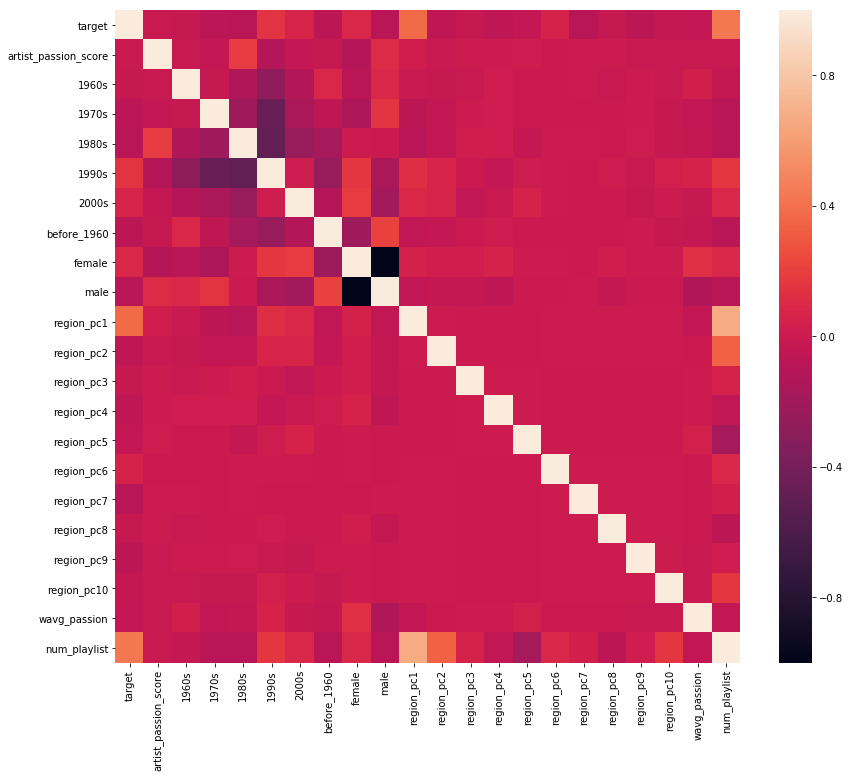

In [321]:
corr = df_final.corr()
plt.figure(figsize=(14,12))
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
plt.show()

As shown in the above, female and male have very high collinearity because essentially they are representing the same information and therefore, we need drop one of them. Also, the age bins variable have high collinearity as well because they are percentage of users and adding up to 1. Therefore, they are perfectly collinear and we need to drop one of the age bin variable. 

In [322]:
# Remove one of highly correlated varibles (test removing other as well)
df_final = df_final.drop(columns=['male', 'before_1960'])

In [323]:
df_final.columns

Index(['target', 'artist_passion_score', '1960s', '1970s', '1980s', '1990s',
       '2000s', 'female', 'region_pc1', 'region_pc2', 'region_pc3',
       'region_pc4', 'region_pc5', 'region_pc6', 'region_pc7', 'region_pc8',
       'region_pc9', 'region_pc10', 'wavg_passion', 'num_playlist'],
      dtype='object')

# 4.	Evaluate algorithms 

*	Split data into training and validation (hold-out) set
*	Use cross-validation to fit different models to training set
*	Select model with the highest cross-validation score as model of choice
*	Tune hyper parameters of chosen model.
*	Test the model on hold-out set


<div class="alert alert-warning">
<b>ACTION: Spot-check algorithms </b> 

<p> Try a mixture of algorithm representations (e.g. instances and trees). </p>

<p> Try a mixture of learning algorithms (e.g. different algorithms for learning the same type of representation).<p>

<p> Try a mixture of modeling types (e.g. linear and nonlinear functions or parametric and nonparametric).</p>

<p> Divide this work up among the different members of your team and then compare and comment on the performance of various approaches.</p>

</div>

In [324]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import auc
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

In [421]:
np.sum(df_final['target'] == 1)

65

In [326]:
df_final.shape

(643, 20)

There are 309 artists in the dataset and 30 of them are labeled as successful.

## 4.1 Splitting training and testing set

We can split the dataset into training and testing set using stratified sampling rather than random sampling. The advantage of stratified sampling is to ensure each set has the same proportion of successful artists. And 30% of data are split into testing set and 70% are in the training set. 

In [327]:
# Split into train and validation set with the stratified sampling
X_train, X_test, y_train, y_test = train_test_split(df_final.iloc[:,1:], df_final['target'], 
                                                    test_size=0.3,stratify=df_final['target'],random_state = 32)

In [422]:
X_train.shape

(450, 19)

In [423]:
X_test.shape

(193, 19)

In [424]:
np.sum(y_train == 1)

45

In [425]:
np.sum(y_test == 1)

20

As result, there are 450 observations in the training set with 45 successful artists and there are 193 observations in the testing set with 20 successful artist.

## 4.2 Trying different classifiers

Different classifers are imported and most of them simply use the default hyperparameters. Noted that some ensemble models such as random forest, AdaBoost and GradientBoosting have also been used with default setting. 

In [332]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

classifiers = [
    DecisionTreeClassifier(random_state=42,max_depth=5),
    SVC(kernel="linear", C=0.025,random_state=42,probability=True),
    SVC(kernel="rbf",random_state=42,probability=True),
    MLPClassifier(hidden_layer_sizes=(100,10),random_state=42,max_iter = 2000),
    LogisticRegression(random_state=42),
    KNeighborsClassifier(3),
    GaussianProcessClassifier(random_state=42),
    RandomForestClassifier(n_estimators=100,random_state=42),
    AdaBoostClassifier(random_state=42),
    GradientBoostingClassifier(n_estimators=100,random_state=42)
]

clf_names = ['dt','lsvc','svc','nn','log','knn','gp','rf','adb','gbc']

<div class="alert alert-warning">
<b>ACTION: Class balance </b> 

<p> Calculate and comment on class balance.</p>

</div>

Since we only have a very small number of successful artists in the training set, we need to resample the training set to balance the class. Noted that the resample methods should not be used before splitting into training and testing set since this might result in same observations in both the training and testing. For a similar reason, in cross validation, we should only use resampling technique after splitting the training set into training and validation set.

We can use over-sampling or under-sampling as our resampling technique. For over-sampling, more 1's will be created while for under-sampling, some of the 0's will be dropped randomly. In this project, we will be using a ratio of 60:40 between 0's and 1's. And these two resampling techniques will be both in cross validation to see which can result in better performance.

The drawback of over-sampling is creating duplicate observations, which might results in over-fitting to the over-sampled class whereas the drawback of under-sampling is the lost of information. 

In [333]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(sampling_strategy=0.67,random_state=42)

In [334]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(sampling_strategy=0.67, random_state=42)

We are using stratified K folds cross validation to check the performance of different classifiers. The advantage of using stratified K folds is that, since we only have a very small number of 1's in the training set, it make sure each fold has the same proportion of 1's. And we are using three folds in this project.

In [335]:
from sklearn.model_selection import StratifiedKFold

skf = StratifiedKFold(n_splits=3)

The following block of code experiment different classifiers using stratified K-fold cross validation and their accuracy score, AUC of ROC, recall score and f1 score are recorded for each classifier. 

In [379]:
score_mean = {}
auroc = {}
recall = {}
f1_scores = {}

for clf,name in zip(classifiers,clf_names):
    
    scores = []
    aucs = []
    rts = []
    f1s = []
    
    for train_index, test_index in skf.split(np.array(X_train), np.array(y_train)):

        X_train_cv, X_val = np.array(X_train)[train_index], np.array(X_train)[test_index]
        y_train_cv, y_val = np.array(y_train)[train_index], np.array(y_train)[test_index]
        
        # enlarge the number of 1's by four times
        #X_train_res, y_train_res = ros.fit_resample(X_train_cv, y_train_cv)
        # then make sure the ratio of 0's and 1's is 60:40
        X_train_dres, y_train_dres = rus.fit_resample(X_train_cv, y_train_cv)
        
        clf.fit(X_train_dres,y_train_dres)
        
        y_pred = clf.predict(X_val)
        y_pred_proba = clf.predict_proba(X_val)[:, 1]
        
        scores.append(accuracy_score(y_val, y_pred))
        
        tn, fp, fn, tp = confusion_matrix(y_val,y_pred).ravel()
        
        auc = roc_auc_score(y_val, y_pred_proba)
        aucs.append(auc)
        
        rts.append(tp/(fn+tp))
        
        f1s.append(f1_score(y_val,y_pred))
                        
                
    
    print(name)
    score_mean[name] = np.mean(scores)
    auroc[name] = np.mean(aucs)
    recall[name] = np.mean(rts)
    f1_scores[name] = np.mean(f1s)

dt
lsvc
svc
nn
log
knn
gp
rf
adb
gbc


In [380]:
# accuracy score
score_mean

{'dt': 0.7222222222222223,
 'lsvc': 0.9044444444444445,
 'svc': 0.8822222222222221,
 'nn': 0.7688888888888888,
 'log': 0.831111111111111,
 'knn': 0.6866666666666666,
 'gp': 0.7822222222222223,
 'rf': 0.8644444444444445,
 'adb': 0.7999999999999999,
 'gbc': 0.791111111111111}

In [381]:
auroc

{'dt': 0.7647736625514403,
 'lsvc': 0.8483127572016461,
 'svc': 0.8404938271604938,
 'nn': 0.7876543209876542,
 'log': 0.8327572016460906,
 'knn': 0.7767901234567901,
 'gp': 0.7768724279835392,
 'rf': 0.8693827160493827,
 'adb': 0.806090534979424,
 'gbc': 0.8441975308641975}

In [382]:
recall

{'dt': 0.7555555555555555,
 'lsvc': 0.3333333333333333,
 'svc': 0.5111111111111111,
 'nn': 0.5777777777777778,
 'log': 0.6666666666666666,
 'knn': 0.7555555555555555,
 'gp': 0.7333333333333334,
 'rf': 0.7333333333333334,
 'adb': 0.6222222222222222,
 'gbc': 0.6666666666666666}

In [383]:
f1_scores

{'dt': 0.3535762483130904,
 'lsvc': 0.40867707172054996,
 'svc': 0.4659304334760724,
 'nn': 0.3271086212262683,
 'log': 0.44354034099727296,
 'knn': 0.32673551348250146,
 'gp': 0.3980152401205033,
 'rf': 0.5219789925672278,
 'adb': 0.3870822041553748,
 'gbc': 0.3893947482142403}

According to the cross validation results shown above, the random forest classifer seems to be the best one among others. Even though the SVM (lsvc and svc) have a higher accuracy score, this problem mainly focus on predicting successful artists rather than predicting unsuccessful artists, we are more interested in measurements such as AUC, recall and precision rather than accuracy score. In terms of AUC, recall and F1 score (a combination of recall and precision), random forest classifer performs better than other classifiers. Also, the performance of under-sampling has been better than over-sampling, so under-sampling is used.

The random forest model has achieved an accuracy score of 0.86, an AUC of 0.87, a recall score of 0.73 and a F1 score of 0.52. 

# 5. Improve Results 

## 5.1 Hyper parameter tuning

<div class="alert alert-warning">
<b>ACTION:  Hyper Parameter Tuning  </b> 

<p> Perform hyperparameter turing and demonstrate improved performance. Comment on any specific behaviour of your chosen classifier and set out the final structure and parameter settings.</p>

</div>

The best model (random forest) is used to do hyper parameters tuning in order to find out the optimal sets of hyper-parameters. The hyper parameters to search includes the number of estimators, the criterion for splitting and the max_depth of the trees. And we are searching for the set of hyper parameters with the highest F1 score (a combination of recall and precision), which is more suitable than accuracy in this project. 

In [397]:
from sklearn.model_selection import GridSearchCV

RF = RandomForestClassifier(n_estimators=100,random_state=42)


# GRIDSEARCH
RF_param_grid = {'n_estimators':[10,25,50,100,300,500,700,900],
                 'criterion':('gini','entropy'),'max_depth':[2,5,None]}

Grid = GridSearchCV(RF, RF_param_grid, cv=5, scoring='precision')

X_train_dres, y_train_dres = RandomUnderSampler(sampling_strategy=0.67, random_state=42).fit_resample(X_train, y_train)
#X_train_res, y_train_res = RandomOverSampler(sampling_strategy=0.67, random_state=42).fit_resample(X_train, y_train)

Grid.fit(X_train_dres, y_train_dres)


D:\Programs\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=42, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': [10, 25, 50, 100, 300, 500, 700, 900], 'criterion': ('gini', 'entropy'), 'max_depth': [2, 5, None]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='precision', verbose=0)

In [385]:
Grid.best_params_

{'criterion': 'entropy', 'max_depth': None, 'n_estimators': 300}

In [386]:
Grid.best_score_

0.7584123122933384

It turns out that the set of parameters that achieves the highest F1 score of 0.76 is shown above. 

## 5.2 Ensemble modelling

<div class="alert alert-warning">
<b>ACTION:  Ensemble modeling  </b> 

<p> Build an ensemble model and demonstrate improved performance. Comment on any specific behaviour of your chosen classifier and set out the final structure and parameter settings.</p>

<p> Divide this work up among the different members of your team and then compare and comment on the performance of various approaches.</p>

</div>

Since a couple of ensemble classifiers have been tried above, we will be a Voting Classifier by using the best classifiers as base estimator to try to improve the result, which are the random forest, Support Vector Classifer with linear kernel and AdaBoost.

In [426]:
from sklearn.ensemble import VotingClassifier

RF = RandomForestClassifier(criterion='entropy', max_depth = None, n_estimators = 300, random_state=42)
lsvc = SVC(kernel="linear", random_state=42,probability=True)
Ada = AdaBoostClassifier(random_state=42)

clfs = [('rf', RF), ('ada', Ada), ('lsvc', lsvc)]

vclf = VotingClassifier(estimators=clfs, voting='soft')

X_train_dres, y_train_dres = RandomUnderSampler(sampling_strategy=0.67, random_state=42).fit_resample(X_train, y_train)
#X_train_res, y_train_res = RandomOverSampler(sampling_strategy=0.67, random_state=42).fit_resample(X_train, y_train)

vclf_scores = cross_val_score(vclf, X_train_dres, y_train_dres, cv=5, scoring='f1')

np.mean(vclf_scores)

0.7489592760180995

As shown above, the voting classifier achieves a lower F1 score than the hyper-parameter tuned random forest. Therefore, the random forest will be chosen as the final model for this project.

# 6. Present Results

## 6.1 Confusion matrix

<div class="alert alert-warning">
<b>ACTION:  Confusion matrix  </b> 

<p> Comment on the performance of your final algorithm. Repeat analysis from earlier in the Notebook if necessary. </p>

<p> Explain confusion matrix results, calculate accuracy and precision etc. </p>

</div>

By applying the random forest model on the hold-out testing set, we can see the generalizability of the classifier and how well it performs on unseen data.

In [407]:
final_model = RandomForestClassifier(criterion='entropy', max_depth = None, n_estimators = 300, random_state=42)

In [408]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix

X_train_dres, y_train_dres = RandomUnderSampler(sampling_strategy=0.67, random_state=42).fit_resample(X_train, y_train)
#X_train_res, y_train_res = RandomOverSampler(sampling_strategy=0.67, random_state=42).fit_resample(X_train, y_train)

final_model.fit(X_train_dres,y_train_dres)
y_pred = final_model.predict(X_test)
y_pred_proba = final_model.predict_proba(X_test)[:, 1]

In [409]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.8860103626943006

It achieves an accuracy score of 88.6%, but more importantly we need to look at the confusion matrix.

Confusion matrix, without normalization
[[159  14]
 [  8  12]]
Normalized confusion matrix
[[0.92 0.08]
 [0.4  0.6 ]]


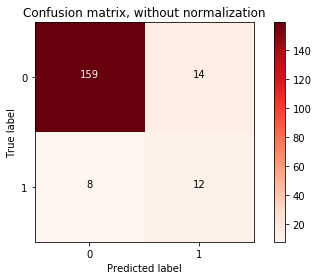

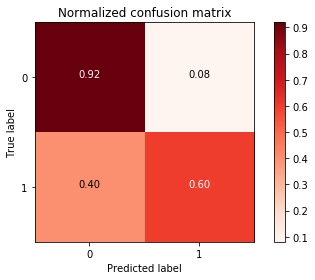

In [410]:
# Plot Confusion Matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Reds):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()


# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=[0,1],title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=[0,1], normalize=True,title='Normalized confusion matrix')

plt.show()

In [411]:
f1_score(y_test, y_pred)

0.5217391304347826

The confusion matrix above shows that within 20 true successful artists, this model can correctly predict 12 of them (60% recall). And for 26 artists that this model predict to be successful, 12 of them are actually successful (46% precision).

## 6.2 ROC Curve 


<div class="alert alert-warning">
<b>ACTION:  ROC Curve </b> 

<p> Comment on the performance of your final algorithm. Repeat analysis from earlier in the Notebook if necessary. </p>

<p> Explain any observations about the ROC results. </p>

</div>

In [412]:
# # ROC curve

# Plot classifier ROC
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

In [413]:
from sklearn.metrics import auc

auc = auc(fpr, tpr)

In [414]:
from sklearn.metrics import roc_auc_score

roc_auc = roc_auc_score(y_test, y_pred_proba)

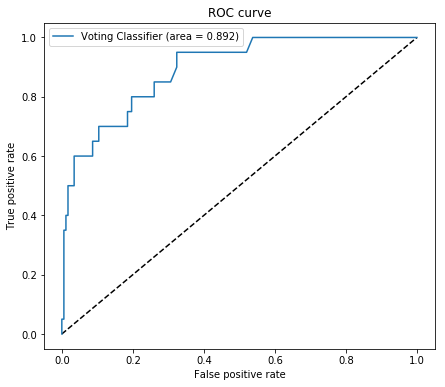

In [415]:
#plt.figure(1)
plt.figure(figsize=(7,6))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='Voting Classifier (area = {:.3f})'.format(auc))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

This model achieve a AUC of 0.89 on the test set.

## 6.3 Feature importance

<div class="alert alert-warning">
<b>ACTION:  Feature importance</b> 

<p> Where possible, comment on the feature selection and performance of your final algorithm. Repeat analysis from earlier in the Notebook if necessary. </p>

<p> Explain any observations about the sensitivity of your final analysis. </p>

</div>

The feature importance of the random forest model is shown below

In [427]:
# Feature importance analysis 
fea_impor = final_model.feature_importances_

In [428]:
pd.DataFrame(fea_impor,index=df_final.columns[1:],columns=['Feature Importance'])

,Feature Importance
artist_passion_score,0.026252
1960s,0.044496
1970s,0.049806
1980s,0.036689
1990s,0.100814
2000s,0.061193
female,0.039552
region_pc1,0.084468
region_pc2,0.120773
region_pc3,0.036350


As we can see from the above table, age bins varaibles and region code PCA variables are very important in predicting the success of an artist. On the other hand, artist passion score and playlist passion score as well as gender is helping very little in the prediction.

## Summary 

Please provide summaries the work completed and the outcomes of the analysis 

- First of all, this is an unbalanced dataset so we need to use resampling techniques to balance the class. However, over-sampling is proved to perform worse than under-sampling in the cross-validation (the reason might be the problem of overfitting to the positive class so that it lack generalizability when it applied to the validation set). This results in a very small training set in the cross validation, especially for the positive class. Therefore, the classifier may not be able features from the positive class very well, which limits their performance. 
 
- Also noted that we have been using scoring metrics such as F1 score and AUC rather than accuracy. This is because in this project, it is more important to correctly predict successful artist rather than correctly predict unsuccessful artist. However, the final model has a relatively good recall but a bad precision and it is worth noting that there is always a trade-off between recall and precision. Therefore, for this final model, when a potentially successful artist comes in, it is good at predicting this artist to be successful but within those artists that this model predicts to be successful, only 46% will be trully successful in the future. 

- The artist and playlist passion scores are not good at predicting the success of an artist, which suggests one can improve the performance of the model by constructing better artist and playlist features. 